### Тема “Обучение с учителем”

#### Задание 1
#### Импортируйте библиотеки pandas и numpy.

In [42]:
import numpy as np
import pandas as pd

#### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

In [43]:
from sklearn.datasets import load_boston

In [51]:
boston = load_boston()

In [52]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [53]:
feature_names = boston['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [54]:
X = pd.DataFrame(boston['data'], columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
# print(boston['DESCR'])

In [56]:
y = pd.DataFrame(boston['target'], columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


#### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# X_train

In [60]:
# X_test

In [61]:
# y_train

In [62]:
# y_test

#### Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()

#### Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [65]:
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_test)
y_pred.shape
# y_pred

(152, 1)

In [67]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


#### Оставил пока для себя
#### Метрики оценки качества моделей регрессии:
#### Средняя квадратическая ошибка

In [68]:
from sklearn.metrics import mean_squared_error

mean_squared_error(check_test["y_pred"], check_test["y_test"])

21.51744423117739

#### Средняя абсолютная ошибка. Она представляет из себя среднее не от квадратов ошибок, а от их модулей:

In [69]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(check_test["y_pred"], check_test["y_test"])

3.162709871457423

#### коэффициент w0 хранится в атрибуте .intercept_

In [70]:
lr.intercept_

array([31.63108404])

#### Остальные коэффициенты w1, …, wn хранятся в атрибуте .coef_:

In [71]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

In [72]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

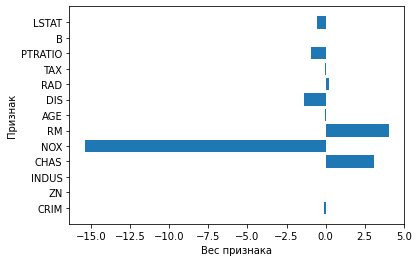

In [73]:
plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [75]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

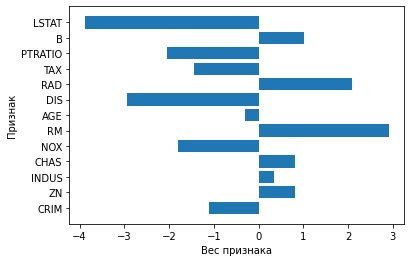

In [76]:
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

#### Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [77]:
from sklearn.metrics import r2_score

In [78]:
R2 = r2_score(y_pred, y_test)
print(R2)

0.6693702691495587


#### Задание 2
#### Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
#### Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

#### Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

In [81]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

#### Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

In [82]:
y_pred_rfr = model.predict(X_test)
y_pred_rfr.shape

(152,)

In [83]:
check_test_rfr = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred_rfr": y_pred_rfr.flatten(),
})

check_test_rfr.head(10)

,y_test,y_pred_rfr
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [87]:
R2_rfr = r2_score(y_pred_rfr, y_test)
print('R2 RandomForestRegressor - ', R2_rfr)
print('R2 LinearRegression - ', R2)

R2 RandomForestRegressor -  0.8479049999699443
R2 LinearRegression -  0.6693702691495587


#### Напишите в комментариях к коду, какая модель в данном случае работает лучше.

#### Модель RandomForestRegressor работает лучше